In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def grad_rosenbrock(x):
    dfdx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    dfdy = 200*(x[1] - x[0]**2)
    return np.array([dfdx, dfdy])




In [7]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    dx = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    dy = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([dx, dy])


In [15]:
#z=0.26(x1^2 + x2^2) - 0.48*x1*x2 , having a global minimum at (0, 0)
def matyas(x):
    return 0.26 * (x[0]**2 + x[1]**2) - 0.48 * x[0] * x[1]

def grad_matyas(x):
    dx = 0.52 * x[0] - 0.48 * x[1]
    dy = 0.52 * x[1] - 0.48 * x[0]
    return np.array([dx, dy])


In [28]:
def booth(x):
    x1, x2 = x
    return (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2

def grad_booth(x):
    x1, x2 = x
    df_dx1 = 2*(x1 + 2*x2 - 7) + 4*(2*x1 + x2 - 5)
    df_dx2 = 4*(x1 + 2*x2 - 7) + 2*(2*x1 + x2 - 5)
    return np.array([df_dx1, df_dx2])


In [ ]:
#z=100(y-x^2)^2+(1-x)^2+sin(5*x)^2 
def func(x):
    x1, x2 = x
    return 100 * (x2 - x1**2)**2 + (1 - x1)**2 + np.sin(5 * x1)**2

def grad_func(x):
    x1, x2 = x
    df_dx1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1) + 10 * np.sin(5 * x1) * np.cos(5 * x1)
    df_dx2 = 200 * (x2 - x1**2)
    return np.array([df_dx1, df_dx2])


In [15]:
def f1(v):
    x, y = v
    return 8 * x**3 + 12 * x**2 * y + 6 * y**2 - 10 * x + 5 * y + 7 
def grad_f1(v):
    x, y = v
    return np.array([24 * x**2 + 24 * x * y - 10, 12 * x**2 + 12 * y + 5])

In [25]:
def f2(v):
    x, y = v
    return np.exp(x) + np.exp(y) + x**2 + y**2
def grad_f2(v):
    x, y = v
    return np.array([np.exp(x) + 2 * x, np.exp(y) + 2 * y])

In [12]:
#z=log(1+x**2+y**2)
def f3(v):
    x, y = v
    return np.log(1 + x**2 + y**2)
def grad_f3(v):
    x, y = v
    denom = 1 + x**2 + y**2
    return np.array([2 * x / denom, 2 * y / denom])

In [ ]:
#z=( x + y )**2 + 3( x – y )**2   
def f4(v): 
    x, y = v
    return (x + y)**2 + 3 * (x - y)**2
def grad_f4(v):
    x, y = v
    return np.array([2 * (x + y) + 6 * (x - y), 2 * (x + y) - 6 * (x - y)])

In [11]:
#creating a noisy function
K = 10
alpha = 0
np.random.seed(27)
phi = 1 * np.pi * np.random.rand(K, K)  # fixed phases

# Function f(v) = sin(x) + y^2 + noise
#changed to f(v) = x^2 + y^2 + noise
def f_structured(v):
    x, y = v
    f_val = x**2 + y**2
    for k1 in range(K):
        for k2 in range(K):
            amp = 1.0 / (1 + k1**2 + k2**2)**(alpha / 2)
            f_val += 0.05*(amp * np.cos(k1 * x + k2 * y + phi[k1, k2]))
    return f_val


In [3]:
#z=8*x**3 + 12*x**2*y + 6*y**2 - 10*x + 5*y + 7
def f5(v):
    x, y = v
    return 8 * x**3 + 12 * x**2 * y + 6 * y**2 - 10 * x + 5 * y + 7 
def grad_f5(v):
    x, y = v
    return np.array([24 * x**2 + 24 * x * y - 10, 12 * x**2 + 12 * y + 5])

In [ ]:
#writing a commaon gradient function that calculates gradient numerically 
def grad_numerical(func, v, h=1e-7):
    grad = np.zeros_like(v)
    for i in range(len(v)):
        v_plus = np.copy(v)
        v_minus = np.copy(v)
        v_plus[i] += h
        v_minus[i] -= h
        grad[i] = (func(v_plus) - func(v_minus)) / (2 * h)
    return grad

In [5]:
import numpy as np

def bfgs(f, grad_f, x0, tol=1e-6, max_iter=100):
    x = x0.astype(float)
    trajectory = [x.copy()]
    n = len(x)
    H = np.eye(n)
    epsilon = 1e-10
    damping = 1e-4

    history = [f(x)] 

    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            print(f"Converged in {i} iterations.")
            break

        p = -H @ grad

        # Backtracking line search
        alpha = 1.0
        c, rho = 1e-4, 0.5
        while f(x + alpha * p) > f(x) + c * alpha * grad @ p:
            alpha *= rho

        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new) - grad

        ys = y @ s
        if ys < epsilon:
            y_damped = y + damping * s
            ys_damped = y_damped @ s
            if ys_damped < epsilon:
                print(f"Skipping update at iter {i}: even damped y.T@s is too small.")
                x = x_new
                history.append(f(x))  # still record function value
                continue
            else:
                y = y_damped
                ys = ys_damped

        rho = 1.0 / ys
        I = np.eye(n)
        H = (I - rho * np.outer(s, y)) @ H @ (I - rho * np.outer(y, s)) + rho * np.outer(s, s)

        x = x_new
        trajectory.append(x.copy())
        history.append(f(x))  # <-- store function value

    print("Final point:", x)
    print("Final function value:", f(x))
    return x, history, trajectory


In [6]:
def plot_function_history(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history, marker='o')
    plt.xlabel("Iteration")
    plt.ylabel("Function Value")
    plt.title("BFGS Function Value History")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [7]:
def plot_trajectory(f, trajectory, levels=50):
    trajectory = np.array(trajectory)
    x_vals = trajectory[:, 0]
    y_vals = trajectory[:, 1]

    # Create grid for contour plot
    xgrid = np.linspace(-20, 20, 200)
    ygrid = np.linspace(-20,20, 200)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.array([[f([x, y]) for x in xgrid] for y in ygrid])

    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, Z, levels=levels, cmap='viridis')
    plt.plot(x_vals, y_vals, marker='o', color='r', linewidth=2, label='BFGS Path')
    plt.scatter(x_vals[0], y_vals[0], color='blue', label='Start')
    plt.scatter(x_vals[-1], y_vals[-1], color='green', label='End')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("BFGS Trajectory")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Skipping update at iter 2: even damped y.T@s is too small.
Skipping update at iter 10: even damped y.T@s is too small.
Converged in 11 iterations.
Final point: [0.09623929 0.16964515]
Final function value: -2.8619883232108974


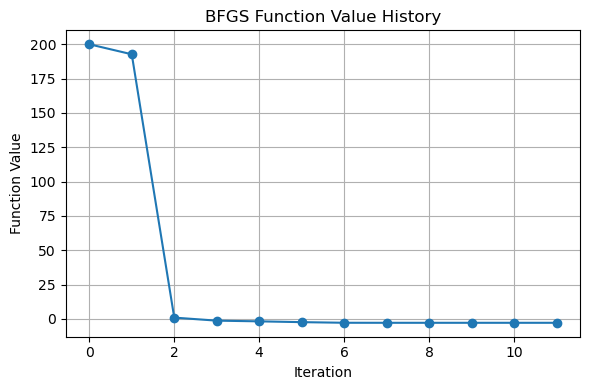

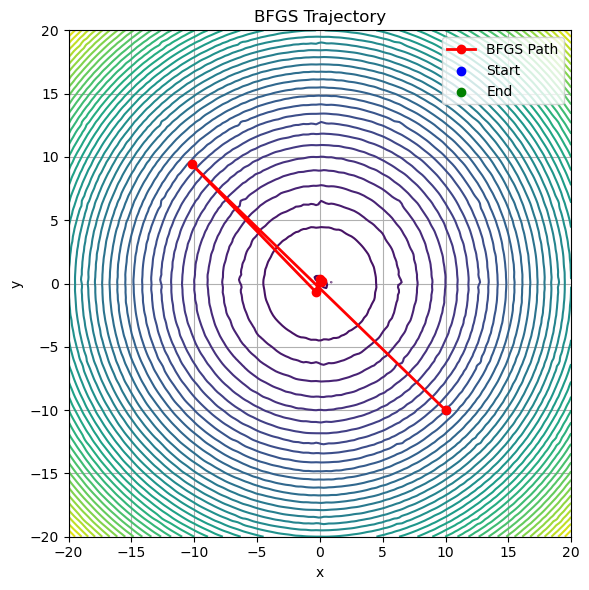

In [12]:
x0 = np.array([10, -10])
solution, history,trajectoryhistory = bfgs(f_structured, lambda x: grad_numerical(f_structured, x), x0)
plot_function_history(history)
plot_trajectory(f_structured, trajectoryhistory)

Converged in 2 iterations.
Final point: [-2.27373675e-13 -2.27373675e-13]


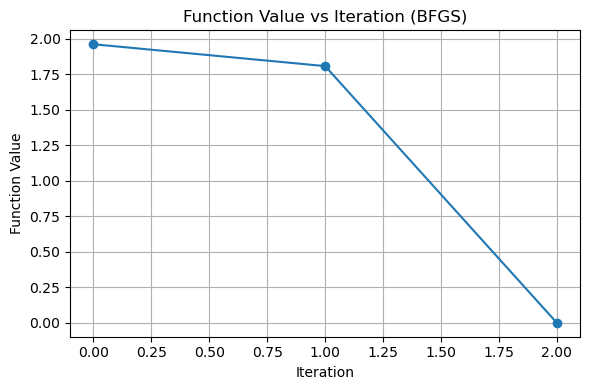

In [ ]:

x0 = np.array([7.0, 7.0])
solution, history = bfgs(matyas, grad_matyas, x0)
plot_function_history(history)

Converged in 7 iterations.
Final point: [0.99999992 3.00000002]


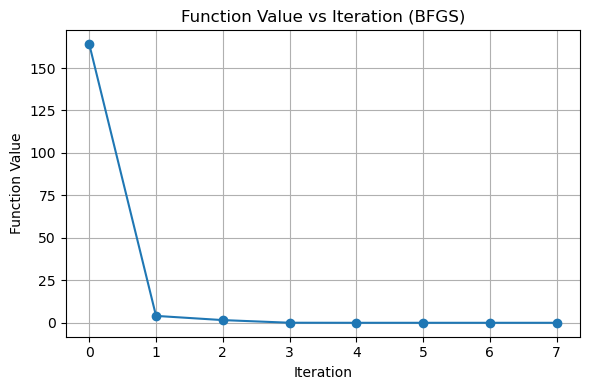

In [86]:
x0 = np.array([5.0, 5.0])
solution, history = bfgs(booth, grad_booth, x0)
plot_function_history(history)

Converged in 7 iterations.
Final point: [-0.35173373 -0.35173373]


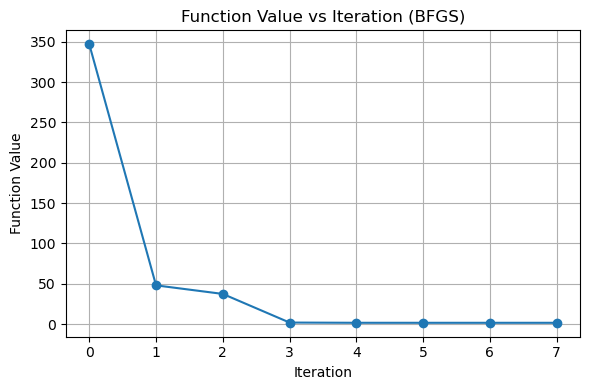

In [87]:
x0 = np.array([5.0, 5.0])
solution, history = bfgs(f2, grad_f2, x0)
plot_function_history(history)

Skipping update at iter 9: even damped y.T@s is too small.
Skipping update at iter 14: even damped y.T@s is too small.
Skipping update at iter 15: even damped y.T@s is too small.
Skipping update at iter 19: even damped y.T@s is too small.
Skipping update at iter 20: even damped y.T@s is too small.
Skipping update at iter 27: even damped y.T@s is too small.
Skipping update at iter 35: even damped y.T@s is too small.
Skipping update at iter 36: even damped y.T@s is too small.
Skipping update at iter 50: even damped y.T@s is too small.
Skipping update at iter 51: even damped y.T@s is too small.
Converged in 52 iterations.
Final point: [-1.15288362  1.32914065]


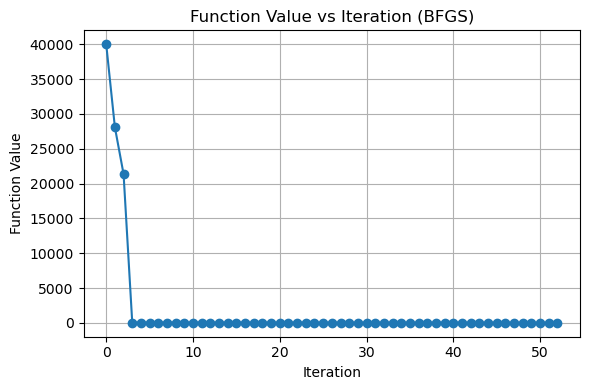

In [88]:
x0 = np.array([5.0, 5.0])
solution, history = bfgs(func, grad_func, x0)
plot_function_history(history)

Skipping update at iter 0: even damped y.T@s is too small.
Skipping update at iter 1: even damped y.T@s is too small.
Skipping update at iter 2: even damped y.T@s is too small.
Skipping update at iter 3: even damped y.T@s is too small.
Skipping update at iter 4: even damped y.T@s is too small.
Skipping update at iter 5: even damped y.T@s is too small.
Skipping update at iter 6: even damped y.T@s is too small.
Skipping update at iter 7: even damped y.T@s is too small.
Skipping update at iter 8: even damped y.T@s is too small.
Skipping update at iter 9: even damped y.T@s is too small.
Skipping update at iter 10: even damped y.T@s is too small.
Skipping update at iter 11: even damped y.T@s is too small.
Skipping update at iter 12: even damped y.T@s is too small.
Skipping update at iter 13: even damped y.T@s is too small.
Skipping update at iter 18: even damped y.T@s is too small.
Converged in 19 iterations.
Final point: [-4.51299789e-13 -4.51286271e-13]


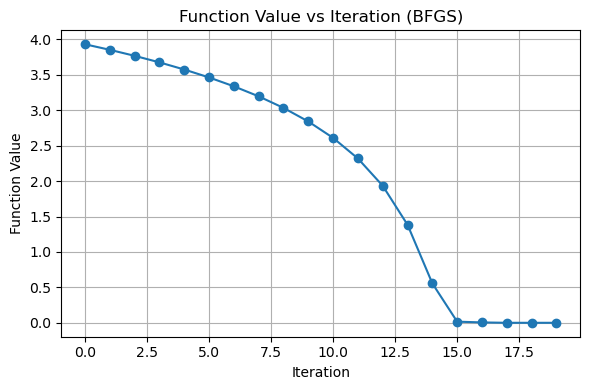

In [89]:
x0 = np.array([5.0, 5.0])
solution, history = bfgs(f3, grad_f3, x0)
plot_function_history(history)

Converged in 6 iterations.
Final point: [8.43376449e-09 6.96050632e-09]


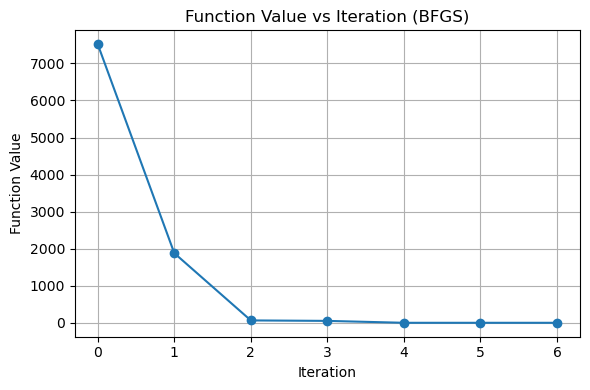

In [91]:
x0 = np.array([27.0, -23.0])
solution, history = bfgs(f4, grad_f4, x0)
plot_function_history(history)

Converged in 6 iterations.
Final point: [8.43376449e-09 6.96050632e-09]


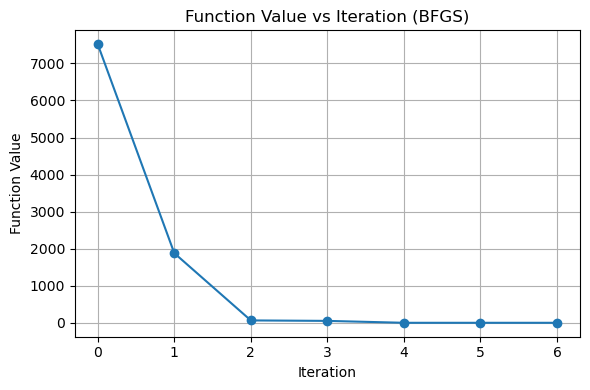

In [93]:
x0 = np.array([27.0, -23.0])
solution, history = bfgs(f4, grad_f4, x0)
plot_function_history(history)